In [ ]:
import numpy as np
from quantum.compiler import *

In [2]:
from qiskit_ibm_runtime.fake_provider import *

fake_backend = FakeBrisbane()
fake_coupling_map = fake_backend.configuration().coupling_map

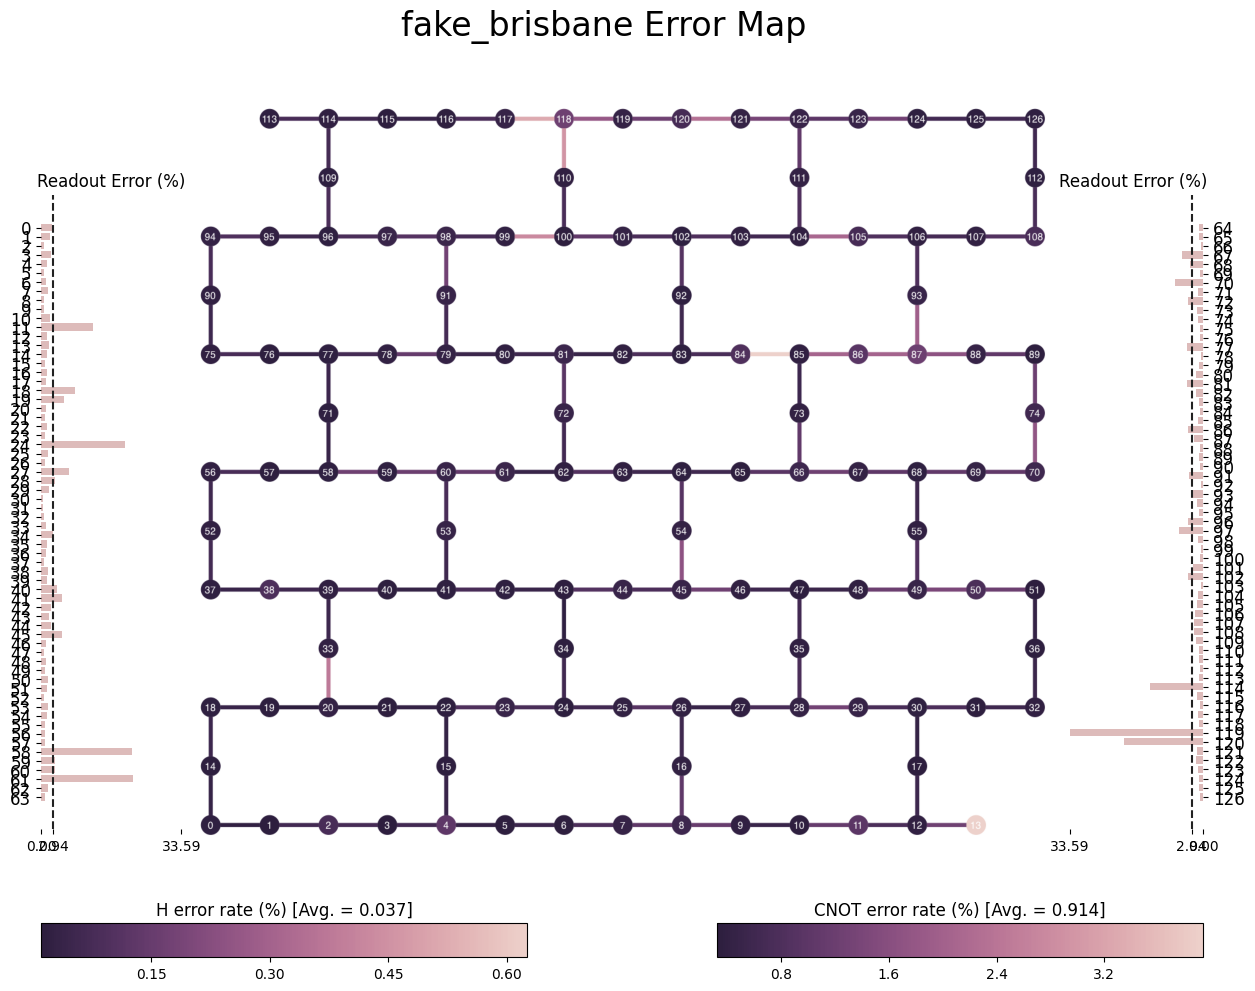

In [3]:
from qiskit.visualization import plot_error_map

plot_error_map(fake_backend)

In [4]:
def hydrogen_trial_circuit(num_qubits):
    qc = QuantumCircuit(num_qubits)
    # prepare the Hartree-Fock state
    qc.x(0)
    qc.x(1)

    qc.rx(np.pi / 2, 0)
    qc.h(1)
    qc.h(2)
    qc.h(3)

    # qc.barrier()
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.cx(2, 3)
    # qc.barrier()

    qc.rz(1.0, 3)

    qc.cx(2, 3)
    qc.cx(1, 2)
    qc.cx(0, 1)

    qc.rx(-np.pi / 2, 0)
    qc.h(1)
    qc.h(2)
    qc.h(3)

    return qc

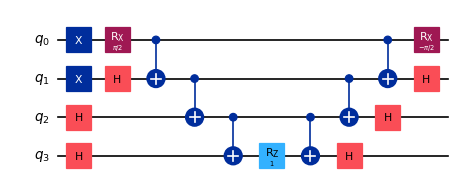

In [5]:
circ = hydrogen_trial_circuit(4)
circ.draw("mpl", scale=0.6)

### ICEBERG Example

In [6]:
det_QED_strategy(circ)

[det_QED_strategy] percent_clifford = 82.35%


'ICEBERG'

[det_QED_strategy] percent_clifford = 82.35%
namespace(t=QuantumRegister(1, 't'), p=QuantumRegister(4, 'p'), b=QuantumRegister(1, 'b'))


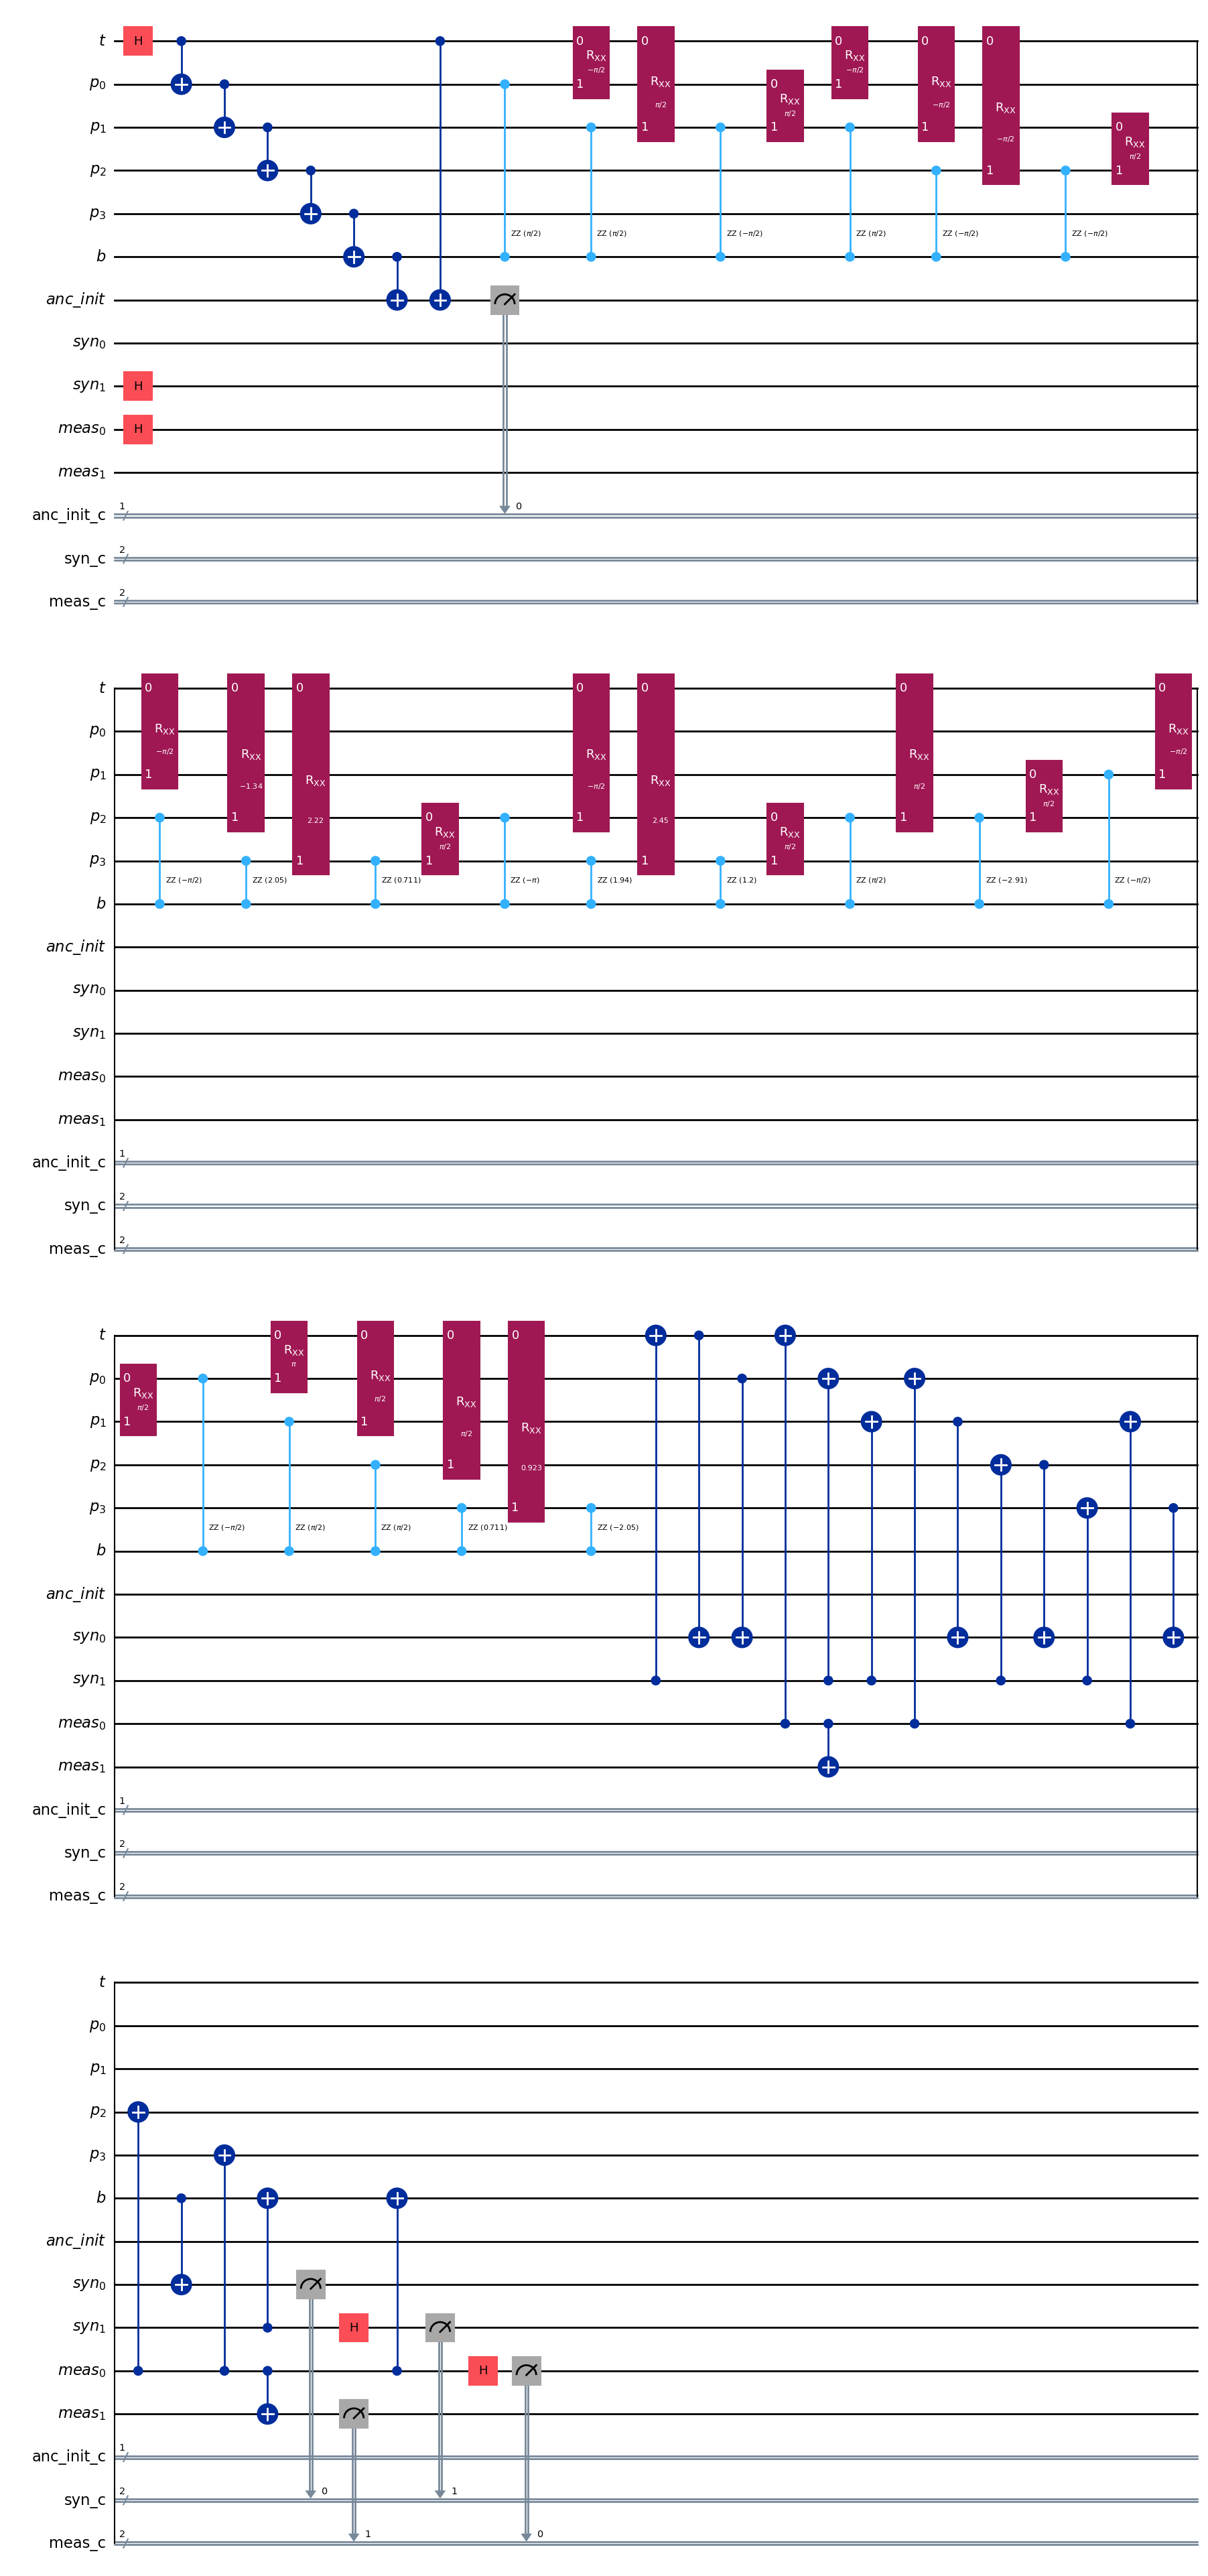

In [7]:
QED_circ, reg_bundle = det_QED(circ, {}, [])

print(reg_bundle)
QED_circ.draw(output="mpl")

### PCS Example

In [8]:
tau = 0.8  # set new threshold

det_QED_strategy(circ, tau=tau)

[det_QED_strategy] percent_clifford = 82.35%


'PCS'

[det_QED_strategy] percent_clifford = 82.35%
Found check 1: +1IIXI, +1IIXI
Found check 2: +1IXII, +1IXII
Found check 3: +1XIII, +1XIII
Found check 4: +1IXXI, +1IXXI
Required number of checks found.
p1_list =  [['+1IIXI', '+1IIXI'], ['+1IXII', '+1IXII'], ['+1XIII', '+1XIII'], ['+1IXXI', '+1IXXI']]
['+1', '+1', '+1', '+1']


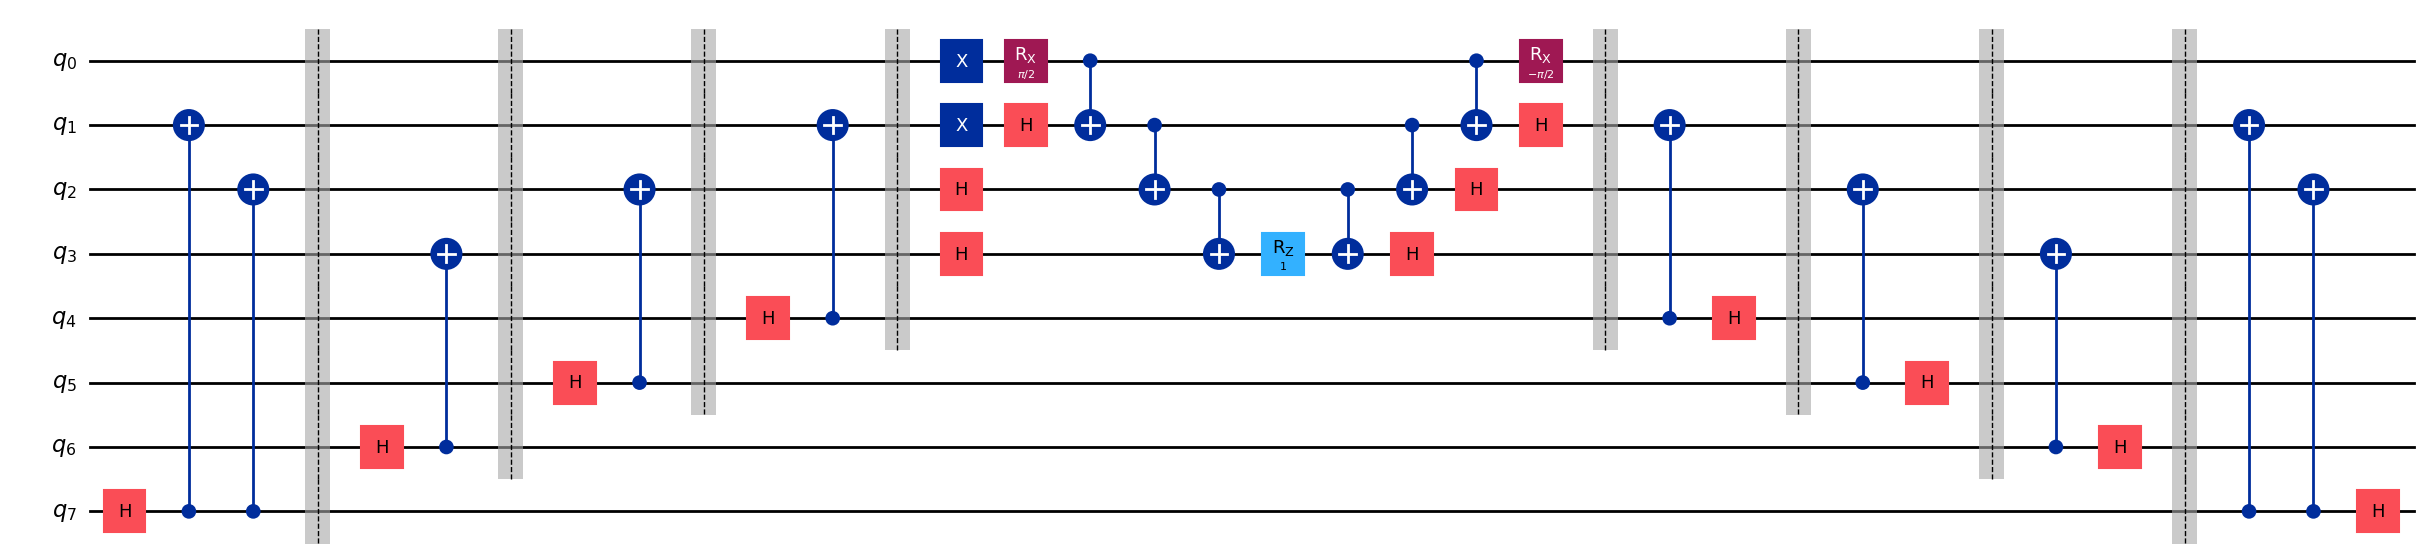

In [11]:
QED_circ, signs_list = det_QED(circ, {}, [], tau=tau, n_checks=4)

print(signs_list)
QED_circ.draw(output="mpl", fold=-1)

#### Ancilla-Free Pauli Checks
##### (not ready to be used in compiler yet)

['+1', '+1', '+1']
[{1: 'X'}, {2: 'X'}, {3: 'X'}]
[{1: 'X'}, {2: 'X'}, {3: 'X'}]


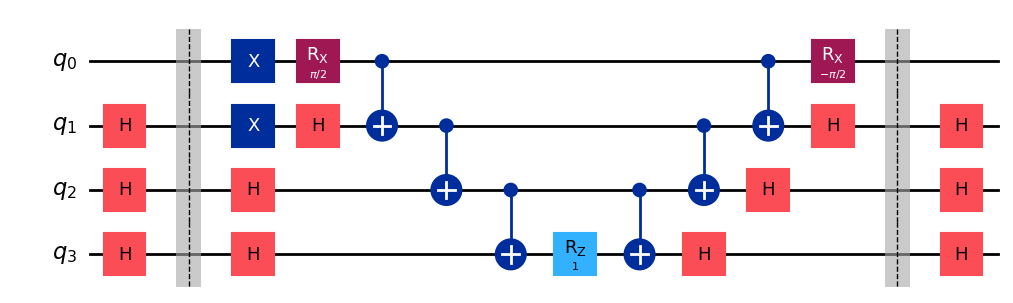

In [10]:
QED_circ, signs_list, left_mappings_list, right_mappings_list = place_afpc(
    circ, {}, [], n_checks=3
)
print(signs_list)
print(left_mappings_list)
print(right_mappings_list)
QED_circ.draw(output="mpl")